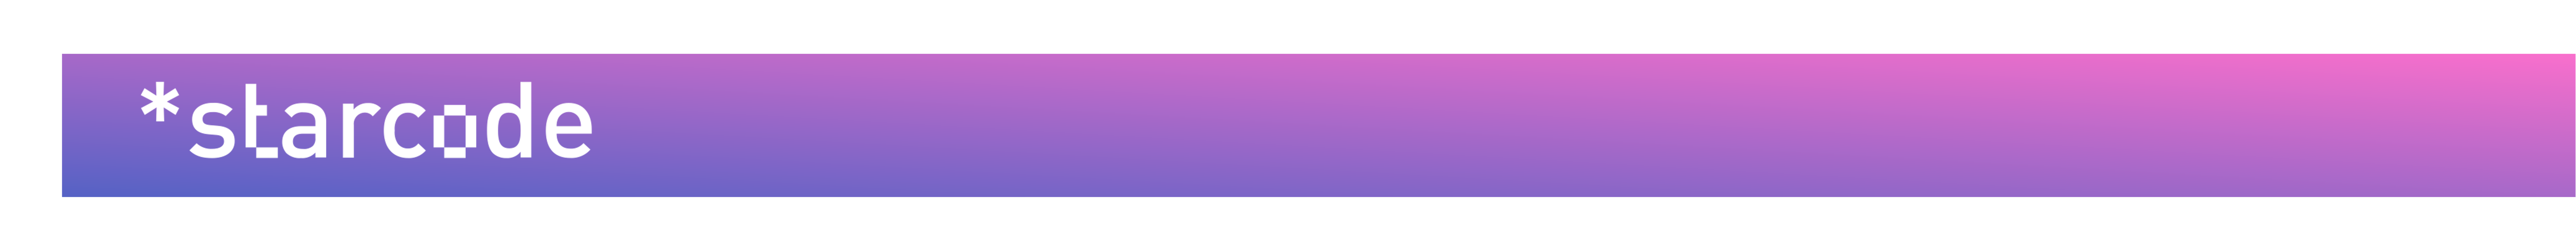



# Künstliche Intelligenz mit Python - <br> Woche 9: lineare Regression (ein Algorithmus)

Willkommen in der neunten Woche. Nachdem wir uns letzte Woche damit beschäftigt haben was hinter den Begriff KI steckt und uns ein erstes Beispiel angeschaut. Hier nocheinmal das wichtigste auf einen Blick:

### Wiederholung

Artificial Intelligence (AI) bzw. Künstliche Intelligenz (KI)
bezieht sich auf die Entwicklung von Computersystemen und Algorithmen, die in der Lage sind, menschenähnliches Denken und Lernen zu simulieren.

Machine Learning ist ein Teilbereich davon, welcher sich mit der Entwicklung von Algorithmen und Modellen beschäftig, die es Computern ermöglichen ohne explizite Programmierung aus Daten zu lernen und Vorhersagen oder Entscheidungen zu treffen.

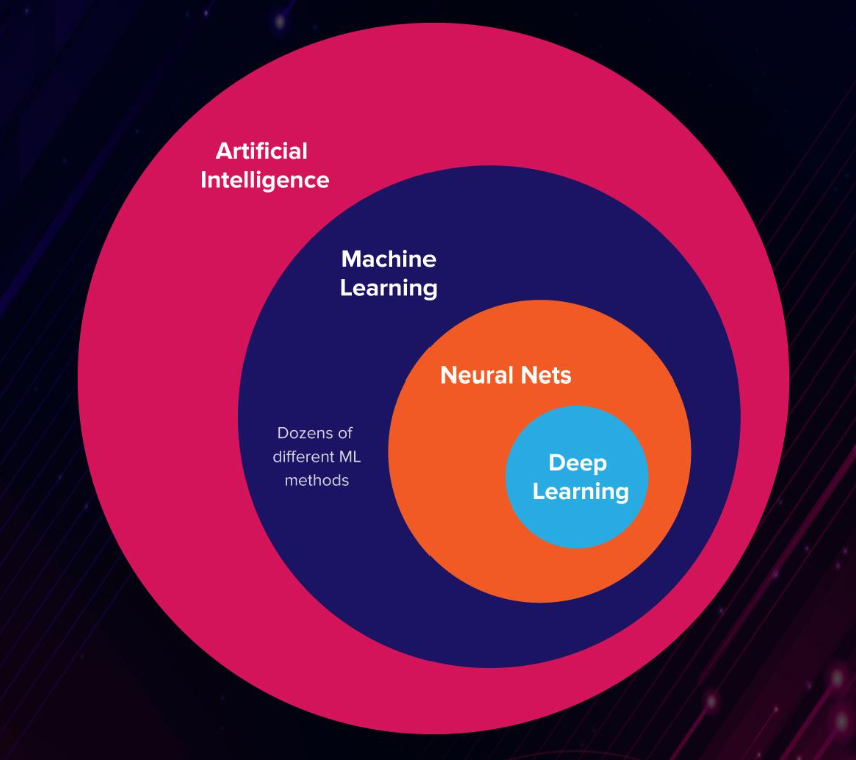

In [1]:
!pip install gdown
import gdown
files = {'ai_ml_image.png':'https://lh3.googleusercontent.com/drive-viewer/AFGJ81pjSqdgRpAB612Evt9n1hqYs1PzoWmm8Q8WEkFKXtjv5pMYyYUY3q-9qelN-Pbm8ohwAeckaXbYwBliHpSUIE1lUFTL=s1600',
        'digits.png': 'https://lh3.googleusercontent.com/drive-viewer/AFGJ81pH9Y6Lday5PATDUvIlI-H3a9DJ--hhlWtZPfsPBEKxARZHsIN8cKY1YCXxXgmcOnFs-Q9_LA3sAE4zPjiQZnABug_Enw=s1600',
        'wo_men.csv': 'https://drive.google.com/uc?export=download&id=1Z_Jva99b3Hz5hxyqXBEmdN_b_dfOWpvW'}
for file in files:
  gdown.download(files[file], file, quiet=True)
from IPython.display import Image, display
display(Image('ai_ml_image.png', width=400))

Eine sehr bekannte KI-Anwendung haben wir bereits letzte Stunde betrachtet. Diese KI hat Zahlen, die von Menschen gemalt wurden, analysiert, und versucht die Zahl zu "raten".

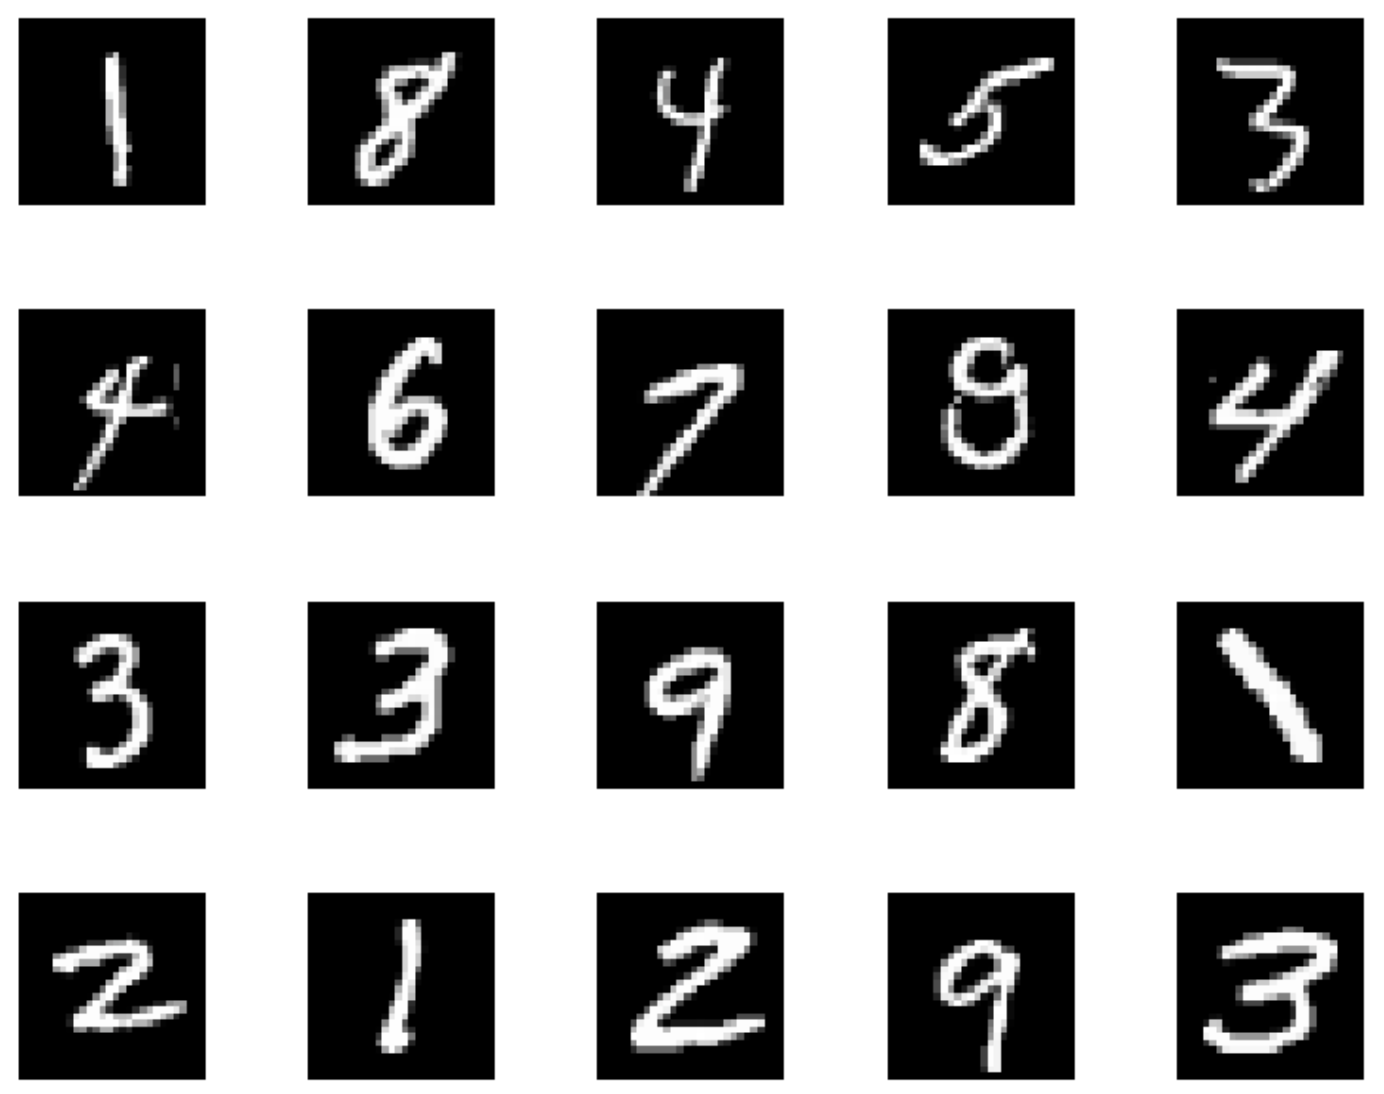

In [2]:
from IPython.display import Image, display
display(Image('digits.png', width=600))

Jetzt wollen wir einen ersten wichtigen Algorithmus kennenlernen.

## Lineare Regresion

Ihr wisst schon aus der Schule, was eine Funktion ist. Einfach gesagt bekommt eine Funktion eine Zahl als Input und gibt eine Zahl als Output aus. Zum Beispiel die Funktion $f(x) =2x$ bekommt eine Zahl und gibt das doppelte zurück.

Funktionen werden in vielen verschiedenen Bereichen verwendet. Die folgende Funktion sagt unsbeispielsweise, wie gross das Volumen eines Würfels der länge x ist.

$f(x) = x^3$

Die Besonderheit bei dem Einsatz von KI ist jetzt, dass man nicht die Funktion direkt schreibt (oft ist diese gar nicht bekannt). Stattdessen, gibt man dem Rechner eine Liste von Inputs mit entsprechenden Outputs und lässt sich daraus eine Funktion entwickeln.

Anstatt $f(x) = x^3$ vorzugeben, schreiben wir :

Würfel 1:  Länge 1, Volumen 1  
Würfel 2:  Länge 2, Volumen 8  
Würfel 3:  Länge 3, Volumen 27  
Würfel 4:  Länge 1.5, Volumen 3.375

Der Computer soll dann "herausfinden", welches Muster dahintersteckt (Voumen = Länge^3).
Wie genau er das herausfinden soll? Nun genau damit beschäftigt sich die ganze Wissenschaft der KI.

In diesem Kapitel beschäftigen wir uns aber nur mit linearen Funktionen. Das heisst, wir reden über Probleme,
wo es eine lineare Beziehung zwischen dem Input und Output gibt.

Wir werden sehen, wie man ein Computerprogramm schreibt, das eine lineare Funktion findet, um eine Variable anhand anderen vorherzusehen.

In [3]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

Wir möchten anhand einer gegebenen Variable eine zweite Variable vorhersehen.

Beispiel: Gewicht anhand von Körpergröße vorhersehen.

Gesucht: lineare Funktion. Also
$Gewicht = Körpergrösse*a + n$, wobei a und n Konstanten sind.

Die Funktion soll natürlich möglichst akkurat sein.


**Perfekt geht leider nicht**

**Wichtig!:** Es ist möglich, dass zwei Personen mit der selbe Körpergrösse unterschiedliche Gewichte haben.
Somit ist keine 100% akkurate Funktion möglich.



### Einschätzung der Präzision

Doch wie messen wir die Präzision einer Funktion? Wir  können es durch den durchschnittlichen Fehler messen.

Beispiel:

Unsere Funktion ist:
$Gewicht = Körpergrösse*a + n$
<br> mit a = 1 und n = -100 gilt:
<br> $Gewicht = Körpergrösse*1  -100$  
<br> **Aufgabe**: Was wäre dann der Fehler unserer Vorhersage bei den folgenden drei Personen? Was wäre der Durschschnittsfehler?

-Ana: 70kg, 167cm  
-Jan: 85kg, 190cm  
-Andy: 90kg, 191cm

**Lösung:**
<br>-Ana wiegt 70kg und ist 167cm. Unsere Funktion sagt, dass Ana 167*1-100= 67 (Kg) wiegt.
(3 kg Fehler, da Ana 70 wiegt).

-Jan wiegt 85kg und ist 190cm. Unsere Funktion sagt, dass Jan 190*1-100=90 (kg) wiegt. (5kg Fehler).

-Andy wiegt 90kg und ist 191cm. Unsere Funktion sagt, dass Andy 191*1-100= 91 kg wiegt. (1 kg Fehler).
Durchschnittlichen Fehler = (3+5+1)/3 = 3 kg in unseren Beispiel.

Diese Variabel möchten wir minimieren.

### Gutes und schlechtes Beispiel


In dem Plot sehen wir einige Messpunkte (roten Punkte) und zwei Linien, die die Punkte vorhersagen sollen.
**Aufgabe**: Welche der Linien passt besser zu den Messpunkten?

**Lösung** <br> Die schwarze Linie ist ein Beispiel einer guten Funktion, die gelbe Linie ist ein Beispiel einer schlechter Funktion.


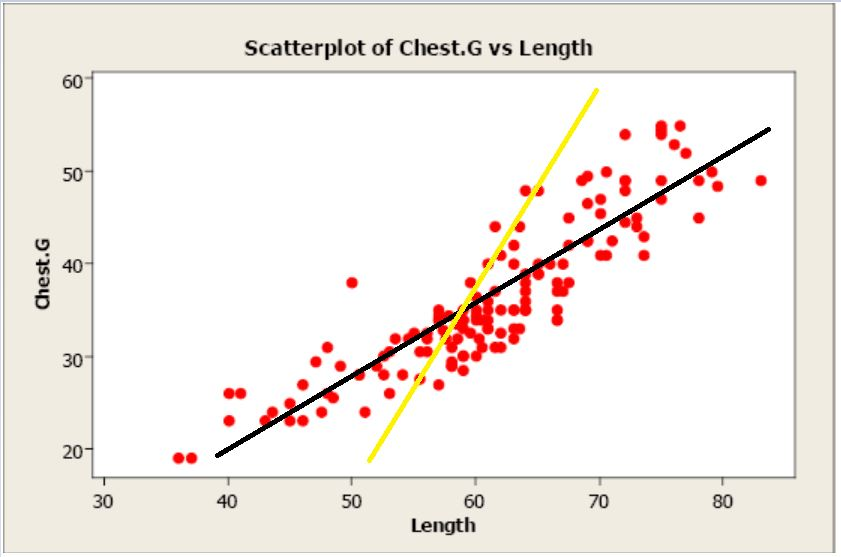


## Lineare Regression verstehen

Eine lineare Funktion lässt sich also durch eine Steigung  (a) und  Verschiebung auf der y-Achse (n) beschreiben.
Wir haben eine Liste von Körpergrößen (H) und ihren entsprechenden Gewichte (W) sowie auch die zwei Parameter a und n.
(Die folgenden Werte sind von Fussballspielern und entsprechen nicht representativ der allgemeine Bevölkerung)

In [4]:
H = np.array([169,170,195,174,180,177,178,174,182,175,175,184,176,180,174,176,173,174,189,182,178,184,187,184,182,172,188, 175])
W = np.array([67, 71,  88, 72, 75, 75, 76, 72, 75, 75, 68, 83, 73, 72, 68, 68, 70, 60, 76, 76, 66, 77, 81,71 ,78, 73, 79 , 69])
a = 1
n = -100

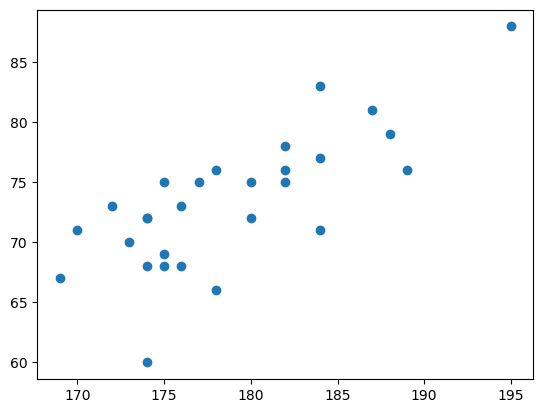

In [5]:
import matplotlib.pyplot as plt
plt.scatter(H, W)

Zunächst brauchen wir eine Liste mit allen den Werten, die unsere Funktion für das Gewicht vorsagt.  
**Aufgabe:** Multipliziere dafür H mit a und addiere dann n.

In [6]:
#dein Code hier

In [7]:
# Lösung:
vorhersage_größe = H * a + n
vorhersage_größe

array([69, 70, 95, 74, 80, 77, 78, 74, 82, 75, 75, 84, 76, 80, 74, 76, 73,
       74, 89, 82, 78, 84, 87, 84, 82, 72, 88, 75])

Super. Somit haben wir schon einmal eine Liste mit Vorhersagen durch unsere Funktion. Jetzt möchten wir den Unterschied zwischen diese Werte und den tatsächliche Werte
(W) haben.
**Aufgabe**: Subtrahiere dafür W von der Liste mit den vorhergesagten Werten.

In [8]:
# dein Code hier

In [9]:
# Lösung
unterschied = vorhersage_größe - W
unterschied

array([ 2, -1,  7,  2,  5,  2,  2,  2,  7,  0,  7,  1,  3,  8,  6,  8,  3,
       14, 13,  6, 12,  7,  6, 13,  4, -1,  9,  6])

Perfekt! Da wir uns jedoch nur um den Unterschied ansich kümmern und vernachlässigen ob die Abweichung nach oben oder unten war (unsere Funktion also ein zu hohes oder ein zu niedriges Gewicht vorhergesagt hat)  brauchen wir die absoluten (also positiven) Werte.
**Aufgabe**: Ändere die Werte des Unterschieds in absolute Werte mit der abs() Funktion.

In [10]:
# dein Code hier

In [11]:
# Lösung
unterschied_abs = abs(unterschied)

Brilliant. Zuletzt möchten wir den Durchschnittswert dieser Liste haben.<br>
**Aufgabe**: Nutze dafür np.mean(). Was bedeutet dieser Wert?

In [12]:
# dein Code hier

In [13]:
# Lösung
np.mean(unterschied_abs)

5.607142857142857

Perfekt. Hier sind unsere ganzen Schritte nochmal in einer Funktion zusammengefasst.
**Aufgabe**: Schaue dir die einzelnen Teile nochmal an und überlege, was genau hier passiert.

In [14]:
def test(a,b, variable1, variable2):
    return np.mean( abs( (a*variable1 + b) - variable2) )

**Anmerkung Lehrende**: Wichtig welche Differenz hier gemessen wird und wofür.
Geht gerne nochmal auf grundlegenden Mechanismen ein mit Hilfe des nächsten Plots.

## Lineare Regression: Worum geht es?

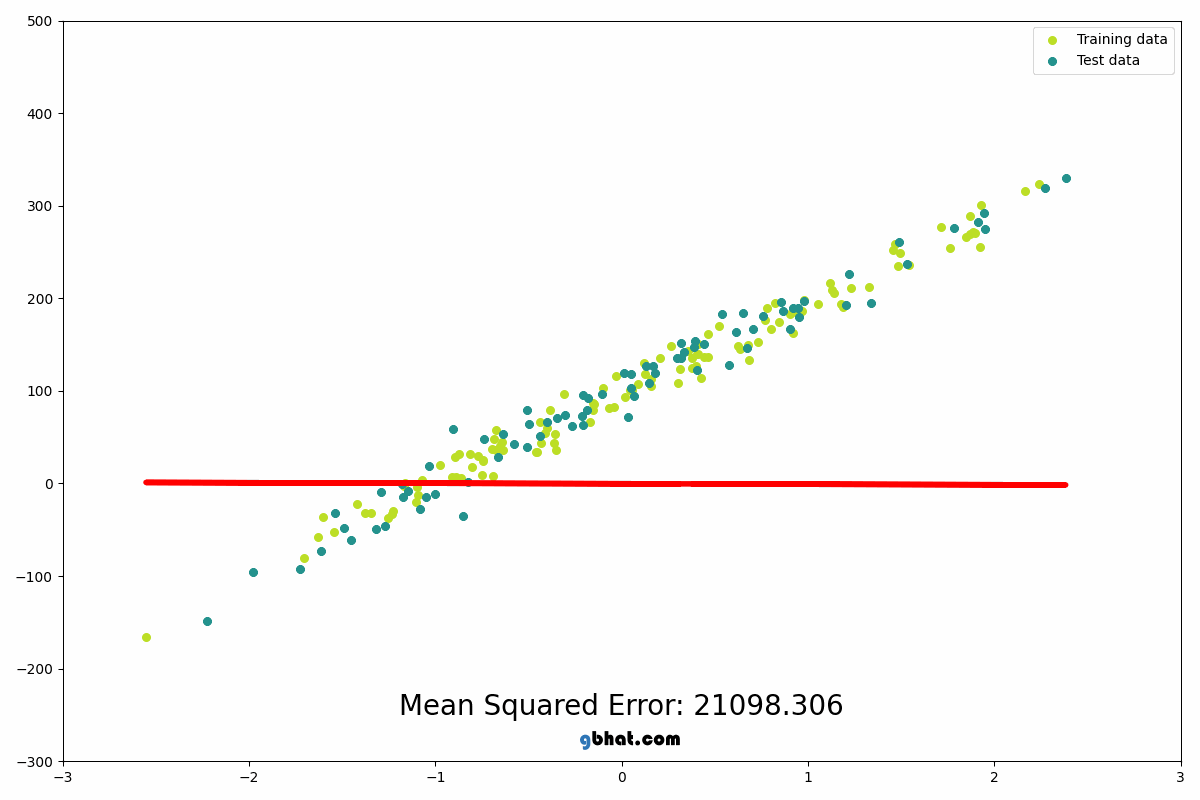

Wir möchten herausfinden, welche Werte a und n haben müssen, damit die Funktion so akkurat wie möglich wird. Oder besser ausgedrückt, wir möchten ein Programm, welches für einen Wert x einen Wert y berechnet der so gut wie möglich dem richtigen y-Wert entspricht. Wir möchten also die Verschiebung auf der y-Achse und die Steigung für die rote Linie finden,so dass wir für alle Messpunkte zusammen, den kleinsten Fehler haben. <br>
Wenn wir eine Funktion besitzen die auf für uns bekannten x-Werte passende y-Werte vorraussagt (also nahe an den bekannten y-Werten), dann können wir diese Funktion auch nutzen, um y-Werte für x-Werte vorherzusagen, die uns noch nicht bekannt sind.

Wir schauen uns jetzt endlich mal an, wie das genau funktioniert. Zunächst nutzen wir wieder einige Bibliotheken.

In [15]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Für die vorprogrammierte Funktion in der Library müssten wir das Format unserer Körpergrößen (x-Wert) ändern.

In [16]:
größe_geändert = H.reshape(-1,1)

In [17]:
größe_geändert

array([[169],
       [170],
       [195],
       [174],
       [180],
       [177],
       [178],
       [174],
       [182],
       [175],
       [175],
       [184],
       [176],
       [180],
       [174],
       [176],
       [173],
       [174],
       [189],
       [182],
       [178],
       [184],
       [187],
       [184],
       [182],
       [172],
       [188],
       [175]])

Nun generieren wir ein Objekt. Ein Objekt ist ein Element in der Programmierung, das bestimmte Attribute und
Funktionen hat.
In diesem Fall nennen wir das Objekt 'formel'. Es soll eine lineare Funktion darstellen, und hat als Attribute die Parameter a und b, die die Steigung und Höhe (y-Achsenabschnitt) der Funktion darstellen.

Zunächst trainieren wir ein Objekt, indem wir die .fit Funktion aufrufen. Das heißt wir geben der Funktion Körpergrößen und Gewichte und lassen sie einen Zusammenhang lernen.

In [18]:
formel = LinearRegression(fit_intercept=True)
formel = formel.fit(größe_geändert,W)

In [19]:
# So lassen wir uns die vorhergesagten Gewichte zu Körpergrößen ausgeben
formel.predict(größe_geändert)

array([66.57346037, 67.26416258, 84.53171802, 70.02697145, 74.17118476,
       72.0990781 , 72.78978032, 70.02697145, 75.55258919, 70.71767367,
       70.71767367, 76.93399363, 71.40837589, 74.17118476, 70.02697145,
       71.40837589, 69.33626923, 70.02697145, 80.38750471, 75.55258919,
       72.78978032, 76.93399363, 79.00610028, 76.93399363, 75.55258919,
       68.64556702, 79.69680249, 70.71767367])

In [20]:
# So können wir uns den Parameter für a (Steigung der Funktion) ausgeben lassen
formel.coef_[0]

0.6907022173480929

In [21]:
# So können wir uns den Parameter für n (y-Achsenabschnitt) ausgeben lassen.
formel.intercept_

-50.155214366496466

**Aufgabe**: Was bedeuten die Werte? Was bedeutet es wenn die Steigung positiv ist? 

(0.0, 90.0)

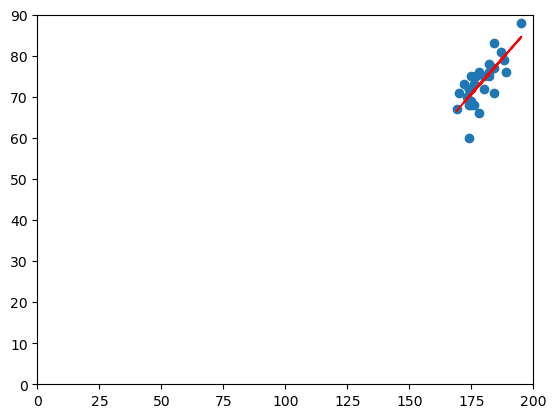

In [22]:
# Zur Besprechung der Lösung (darauf eingehen, dass obiger Plot mit den Datenpunkten den Eindruck erweckt
# n müsste ca 65 sein und das nur an der Achsenlänge liegt)
import matplotlib.pyplot as plt
vorhersagen = formel.predict(größe_geändert)
plt.scatter(größe_geändert, W)
plt.plot(größe_geändert, vorhersagen, color='red', label='Regression Line')
plt.xlim(0, 200)  
plt.ylim(0, 90)  

Jetzt nutzen wir nochmal unsere test Funktion, die wir vorhin geschrieben haben, um zu sehen, wie gut unsere Vorgersage funktioniert.
**Aufgabe**: Rufe die test Funktion mit den Paramteren a und b von oben auf.

In [23]:
# dein Code hier

In [24]:
# Lösung
test(formel.coef_[0],formel.intercept_, H, W)
# Im Durchschnitt sind wir mit unserer Vorhersage 2.9kg daneben.

2.887822945073021

Jetzt schauen wir uns nochmal kurz den Vergleich an zu unserer am Anfang angenommenen Linie und der trainierten Regressionslinie. 

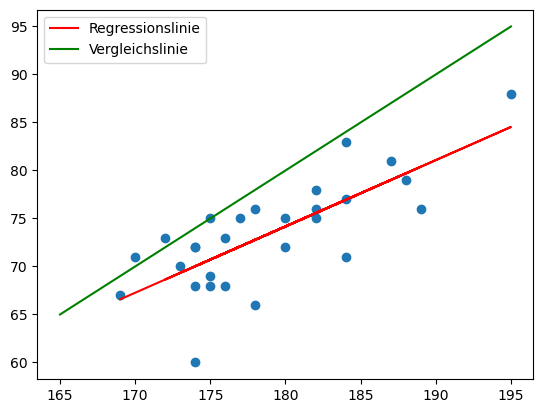

In [25]:
plt.scatter(größe_geändert, W)
plt.plot(größe_geändert, vorhersagen, color='red', label='Regressionslinie')
slope = 1
intercept = -100
x = np.linspace(165, 195, 500)
y = slope * x + intercept
plt.plot(x, y, color='green', label='Vergleichslinie')
plt.legend()

## Ihr seid dran!

Jetzt seid ihr dran eure erste eigene lineare Regression zu implementieren. Euer erster kleiner Machine Learning Algorithmus also! <br> Hinweis: Versucht euch erstmal selber und schaut nur im Notfall oben nach. So lernt ihr am meisten.

In [26]:
data = pd.read_csv('wo_men.csv')
pd.set_option('display.max_rows', 120)
data = data.drop(data[data['sex'] == 'man'].index)
data = data.drop(index=[47, 61, 67, 77, 80, 85])

In [27]:
schuhgröße = data['shoe_size'].values
körpergröße = data['height'].values

Wir haben eine Liste mit Schuhgrößen und Körpergrößen. In einem Plot sehen die Datenpunkte so aus.

Text(0.5, 0, 'Körpergröße')

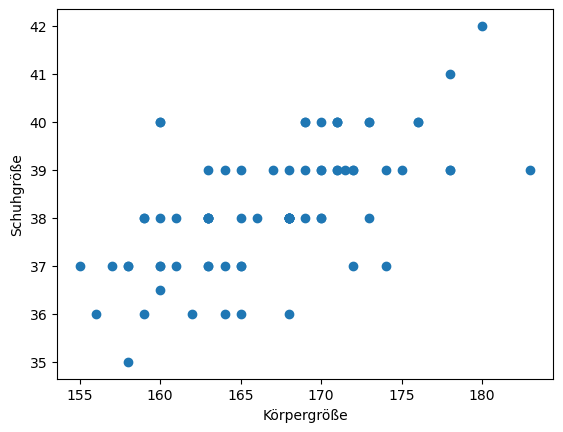

In [28]:
import matplotlib.pyplot as plt
plt.scatter(körpergröße, schuhgröße)
plt.ylabel('Schuhgröße')
plt.xlabel('Körpergröße')

(0.0, 45.0)

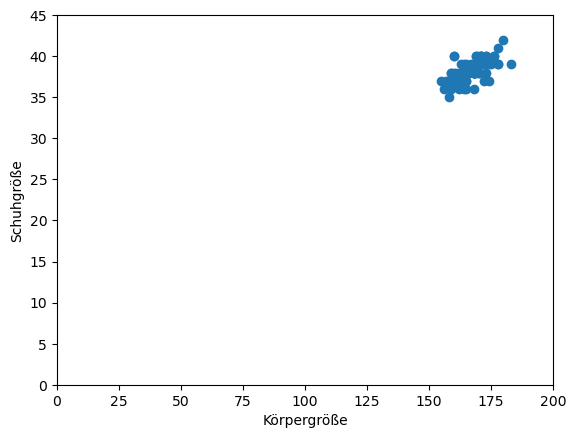

In [29]:
import matplotlib.pyplot as plt
plt.scatter(körpergröße, schuhgröße)
plt.ylabel('Schuhgröße')
plt.xlabel('Körpergröße')
plt.xlim(0, 200)
plt.ylim(0, 45)

**Aufgabe**: Wenn du den Plot so siehst. Was könnte die Steigung und der y-Achsenabschnitt einer Regressionlinie sein? Prüfe deine Vermutung nachher am Ende des Codes. 

**Aufgabe**: Erstelle ein neues Objekt für die lineare Regression. Lasse das Modell mit der .fit Funktion den Zusammenhang lernen. Plotte die resultierende Regressionslinie.

In [30]:
#eurer Code

In [31]:
# Lösung:
körpergröße_geändert = körpergröße.reshape(-1,1)
model = LinearRegression()
model = model.fit(körpergröße_geändert, schuhgröße)
model.predict(körpergröße_geändert)

array([37.28704436, 38.79193425, 39.20235877, 39.47597511, 36.87661984,
       37.28704436, 39.74959146, 38.38150974, 37.97108522, 37.69746888,
       37.01342801, 37.15023619, 36.6030035 , 38.92874243, 37.83427705,
       37.01342801, 39.20235877, 37.83427705, 38.38150974, 38.38150974,
       37.69746888, 37.28704436, 37.42385253, 37.5606607 , 37.97108522,
       37.83427705, 37.42385253, 37.69746888, 38.51831791, 38.79193425,
       37.69746888, 37.15023619, 40.0232078 , 38.38150974, 38.65512608,
       38.38150974, 38.65512608, 38.92874243, 37.69746888, 38.38150974,
       38.51831791, 37.97108522, 38.79193425, 37.97108522, 38.38150974,
       37.28704436, 37.28704436, 38.79193425, 38.24470156, 38.92874243,
       39.0655506 , 39.47597511, 38.86033834, 38.38150974, 39.33916694,
       37.97108522, 36.73981167, 37.69746888, 37.69746888, 38.51831791,
       39.74959146, 38.65512608, 38.38150974, 38.65512608, 39.0655506 ,
       38.79193425, 37.69746888, 38.10789339, 37.15023619, 39.74

In [32]:
model.intercept_

15.397736805192658

In [33]:
model.coef_[0]

0.1368081722086233

**Aufgabe**: Wenn du dir den Plot anschaust, denkst du unser Fehler wird eher klein oder größ sein? Lass ihn dir ausgeben mit der test Funktion.

In [34]:
# dein Code hier

In [35]:
# Lösung
test(model.coef_[0],model.intercept_, körpergröße, schuhgröße)

0.8128251828298584

Glückwunsch! Das war dein erster ML-Algorithmus. <br> Nächste Woche schauen wir uns noch einen neuen Algorthmus an.